In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ucscGenomes descriptions
'''
input was recieved via curl command and stored locally as a json file.

    curl -o list-ucscGenomes.json https://api.genome.ucsc.edu/list/ucscGenomes

'''

path = "list-ucscGenomes.json"
df = pd.read_json(path)
df = df.rename_axis('assembly').reset_index()

'''
The file contains a list of dictionaries, each dictionary contains the following keys and we want to create a pandas dataframe from this data.:
{
    "ucscGenomes": [
        {
            "assembly": "hg38",
            "description": "Human
            "date": "2013-12",
            "numSequences": 93,
            "numBases": 3209286104
        },
        {
            "assembly": "mm10",
            "description": "Mouse",
            "date": "2011-07",
            "numSequences": 66,
            "numBases": 2725765481
        },
        ...
    ]
}

output is a pandas dataframe with the following structure:
assembly	description	date	numSequences	numBases
hg38	    Human	            2013-12	93	    3209286104
mm10	    Mouse	            2011-07	66	    2725765481
...
'''

# get the keys of the first dictionary assuming that all dictionaries have the same keys
columns = list(df["ucscGenomes"][0].keys()) 

# iterate over the values of the dictionaries and append them to the data list
data = []
for i in df["ucscGenomes"]: 
    data.append(list(i.values()))

# create a pandas dataframe for the descriptions of the ucscGenomes
df_desc = pd.DataFrame(data, columns=columns)
df_desc

,description,nibPath,organism,defaultPos,active,orderKey,genome,scientificName,htmlPath,hgNearOk,hgPbOk,sourceName,taxId
0,Dec. 2009 (BGI-Shenzhen 1.0/ailMel1),/gbdb/ailMel1,Panda,GL192818.1:558576-566855,1,16070,Panda,Ailuropoda melanoleuca,/gbdb/ailMel1/html/description.html,0,0,BGI-Shenzhen AilMel 1.0 Dec. 2009,9646
1,Aug. 2012 (allMis0.2/allMis1),/gbdb/allMis1,American alligator,JH731472:504271-884586,1,1425,American alligator,Alligator mississippiensis,/gbdb/allMis1/html/description.html,0,0,International Crocodilian Genomes Working Group,8496
2,Feb. 2007 (Broad/anoCar1),/gbdb/anoCar1,Lizard,scaffold_72:3056494-3141055,1,12445,Lizard,Anolis carolinensis,/gbdb/anoCar1/html/description.html,0,0,Broad Institute AnoCar (1.0),28377
3,May 2010 (Broad AnoCar2.0/anoCar2),/gbdb/anoCar2,Lizard,chr5:23430070-23476097,1,12444,Lizard,Anolis carolinensis,/gbdb/anoCar2/html/description.html,0,0,Broad Institute of MIT and Harvard AnoCar 2.0 ...,28377
4,Feb. 2003 (IAGEC MOZ2/anoGam1),/gbdb/anoGam1/nib,A. gambiae,chr2R:6479796-6482329,1,1010,A. gambiae,Anopheles gambiae,/gbdb/anoGam1/html/description.html,0,0,IAGEC v.MOZ2,7165
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Nov. 2019 (UCB_Xtro_10.0/xenTro10),/gbdb/xenTro10,X. tropicalis,chr9:21842126-21855658,1,24035,X. tropicalis,Xenopus tropicalis,/gbdb/xenTro10/html/description.html,0,0,"University of California, Berkeley",8364
216,Aug. 2005 (JGI 4.1/xenTro2),/gbdb/xenTro2,X. tropicalis,"scaffold_27:565,941-578,374",1,24039,X. tropicalis,Xenopus tropicalis,/gbdb/xenTro2/html/description.html,0,0,JGI v4.1,8364
217,Nov. 2009 (JGI 4.2/xenTro3),/gbdb/xenTro3,X. tropicalis,GL172663:565941-578374,1,24038,X. tropicalis,Xenopus tropicalis,/gbdb/xenTro3/html/description.html,0,0,US DOE Joint Genome Institute (JGI-PGF) (GCA_0...,8364
218,Sep. 2012 (JGI 7.0/xenTro7),/gbdb/xenTro7,X. tropicalis,KB021661:77920643-77933995,1,24037,X. tropicalis,Xenopus tropicalis,/gbdb/xenTro7/html/description.html,0,0,US DOE Joint Genome Institute (JGI-PGF),8364


In [3]:
# concatenate the two dataframes horizontally
df = pd.concat([df, df_desc], axis=1)

In [4]:
df

,assembly,downloadTime,downloadTimeStamp,dataTime,dataTimeStamp,ucscGenomes,description,nibPath,organism,defaultPos,active,orderKey,genome,scientificName,htmlPath,hgNearOk,hgPbOk,sourceName,taxId
0,ailMel1,2024:04:18T02:20:13Z,1713406813,2024-01-10T15:29:12,1704929352,{'description': 'Dec. 2009 (BGI-Shenzhen 1.0/a...,Dec. 2009 (BGI-Shenzhen 1.0/ailMel1),/gbdb/ailMel1,Panda,GL192818.1:558576-566855,1,16070,Panda,Ailuropoda melanoleuca,/gbdb/ailMel1/html/description.html,0,0,BGI-Shenzhen AilMel 1.0 Dec. 2009,9646
1,allMis1,2024:04:18T02:20:13Z,1713406813,2024-01-10T15:29:12,1704929352,{'description': 'Aug. 2012 (allMis0.2/allMis1)...,Aug. 2012 (allMis0.2/allMis1),/gbdb/allMis1,American alligator,JH731472:504271-884586,1,1425,American alligator,Alligator mississippiensis,/gbdb/allMis1/html/description.html,0,0,International Crocodilian Genomes Working Group,8496
2,anoCar1,2024:04:18T02:20:13Z,1713406813,2024-01-10T15:29:12,1704929352,"{'description': 'Feb. 2007 (Broad/anoCar1)', '...",Feb. 2007 (Broad/anoCar1),/gbdb/anoCar1,Lizard,scaffold_72:3056494-3141055,1,12445,Lizard,Anolis carolinensis,/gbdb/anoCar1/html/description.html,0,0,Broad Institute AnoCar (1.0),28377
3,anoCar2,2024:04:18T02:20:13Z,1713406813,2024-01-10T15:29:12,1704929352,{'description': 'May 2010 (Broad AnoCar2.0/ano...,May 2010 (Broad AnoCar2.0/anoCar2),/gbdb/anoCar2,Lizard,chr5:23430070-23476097,1,12444,Lizard,Anolis carolinensis,/gbdb/anoCar2/html/description.html,0,0,Broad Institute of MIT and Harvard AnoCar 2.0 ...,28377
4,anoGam1,2024:04:18T02:20:13Z,1713406813,2024-01-10T15:29:12,1704929352,{'description': 'Feb. 2003 (IAGEC MOZ2/anoGam1...,Feb. 2003 (IAGEC MOZ2/anoGam1),/gbdb/anoGam1/nib,A. gambiae,chr2R:6479796-6482329,1,1010,A. gambiae,Anopheles gambiae,/gbdb/anoGam1/html/description.html,0,0,IAGEC v.MOZ2,7165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,xenTro10,2024:04:18T02:20:13Z,1713406813,2024-01-10T15:29:12,1704929352,{'description': 'Nov. 2019 (UCB_Xtro_10.0/xenT...,Nov. 2019 (UCB_Xtro_10.0/xenTro10),/gbdb/xenTro10,X. tropicalis,chr9:21842126-21855658,1,24035,X. tropicalis,Xenopus tropicalis,/gbdb/xenTro10/html/description.html,0,0,"University of California, Berkeley",8364
216,xenTro2,2024:04:18T02:20:13Z,1713406813,2024-01-10T15:29:12,1704929352,"{'description': 'Aug. 2005 (JGI 4.1/xenTro2)',...",Aug. 2005 (JGI 4.1/xenTro2),/gbdb/xenTro2,X. tropicalis,"scaffold_27:565,941-578,374",1,24039,X. tropicalis,Xenopus tropicalis,/gbdb/xenTro2/html/description.html,0,0,JGI v4.1,8364
217,xenTro3,2024:04:18T02:20:13Z,1713406813,2024-01-10T15:29:12,1704929352,"{'description': 'Nov. 2009 (JGI 4.2/xenTro3)',...",Nov. 2009 (JGI 4.2/xenTro3),/gbdb/xenTro3,X. tropicalis,GL172663:565941-578374,1,24038,X. tropicalis,Xenopus tropicalis,/gbdb/xenTro3/html/description.html,0,0,US DOE Joint Genome Institute (JGI-PGF) (GCA_0...,8364
218,xenTro7,2024:04:18T02:20:13Z,1713406813,2024-01-10T15:29:12,1704929352,"{'description': 'Sep. 2012 (JGI 7.0/xenTro7)',...",Sep. 2012 (JGI 7.0/xenTro7),/gbdb/xenTro7,X. tropicalis,KB021661:77920643-77933995,1,24037,X. tropicalis,Xenopus tropicalis,/gbdb/xenTro7/html/description.html,0,0,US DOE Joint Genome Institute (JGI-PGF),8364


In [5]:
# create a dataframe with the assemblies grouped by organisms
df_grouped = df.groupby("organism").agg({"assembly": list}).reset_index()
df_grouped

,organism,assembly
0,A. gambiae,"[anoGam1, anoGam3]"
1,A. mellifera,"[apiMel1, apiMel2]"
2,African clawed frog,[xenLae2]
3,Alpaca,"[vicPac1, vicPac2]"
4,American alligator,[allMis1]
...,...,...
103,Wallaby,[macEug2]
104,White rhinoceros,[cerSim1]
105,X. tropicalis,"[xenTro1, xenTro10, xenTro2, xenTro3, xenTro7,..."
106,Zebra finch,"[taeGut1, taeGut2]"


In [ ]:
# export
df_grouped.to_csv("datasets/uscsGenome_assemblies_grouped_by_organism.csv", index=False)

<Axes: title={'center': 'Organisms by count from UCSC Genomes Database'}, xlabel='Organism', ylabel='Number of assemblies'>

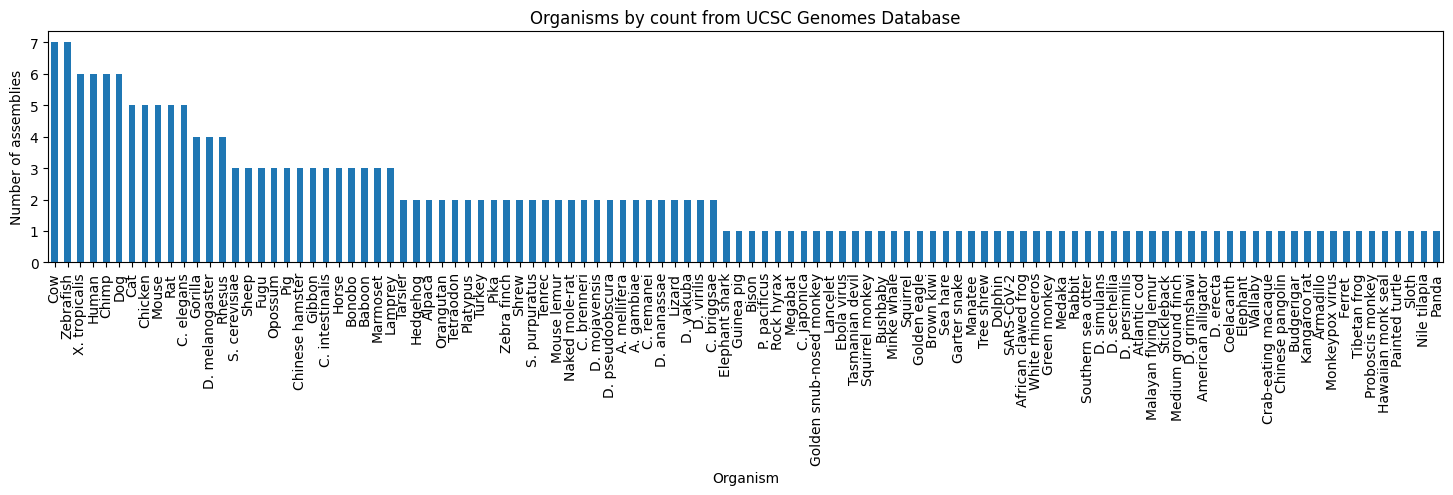

In [6]:
# ucscGenomes organisms
'''
Chart for the number of assemblies per organism stored in UCSC Genomes Database
'''

organism = []
for i in range(len(df["ucscGenomes"])):
    organism.append(df["ucscGenomes"][i]['organism'])
organism = pd.Series(organism)
plt.figure(figsize=(18, 3))
plt.title('Organisms by count from UCSC Genomes Database')
plt.ylabel('Number of assemblies')
plt.xlabel('Organism')
organism.value_counts().plot(kind='bar')